In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import ast
from collections import Counter

In [2]:
raw_data = pd.read_csv('/home/lim/dev_ws/eda/ros_eda_project/data/movie_genre_data.csv')
raw_data.head()

,Unnamed: 0,Name,Year,Genre,Viewers
0,0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,1,설국열차,2013,"['SF', '액션']","9,349,993"
2,2,관상,2013,"['사극', '드라마']","9,134,238"
3,3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,4,베를린,2013,['액션'],"7,166,290"


In [3]:
raw_data = raw_data.drop("Unnamed: 0", axis=1)
raw_data.head()

,Name,Year,Genre,Viewers
0,7번방의 선물,2013,"['코미디', '드라마']","12,811,206"
1,설국열차,2013,"['SF', '액션']","9,349,993"
2,관상,2013,"['사극', '드라마']","9,134,238"
3,아이언맨 3,2013,"['액션', '어드벤처', 'SF']","9,001,331"
4,베를린,2013,['액션'],"7,166,290"


In [4]:
raw_data = raw_data[["Year", "Name", "Genre", "Viewers"]]
raw_data.head()

,Year,Name,Genre,Viewers
0,2013,7번방의 선물,"['코미디', '드라마']","12,811,206"
1,2013,설국열차,"['SF', '액션']","9,349,993"
2,2013,관상,"['사극', '드라마']","9,134,238"
3,2013,아이언맨 3,"['액션', '어드벤처', 'SF']","9,001,331"
4,2013,베를린,['액션'],"7,166,290"


In [9]:
raw_data = raw_data[(raw_data["Year"] >= 2014) & (raw_data["Year"] <= 2023)]
raw_data.reset_index(drop=True, inplace=True)
raw_data.head()

,Year,Name,Genre,Viewers
0,2014,명량,"['사극', '액션']","17,613,682"
1,2014,겨울왕국,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']","10,296,101"
2,2014,인터스텔라,['SF'],"10,105,247"
3,2014,해적: 바다로 간 산적,['어드벤처'],"8,666,046"
4,2014,수상한 그녀,['드라마'],"8,657,982"


In [11]:
years = raw_data["Year"].unique()
years

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [19]:
genre_2014 = raw_data[(raw_data["Year"] == 2014)]
genre_2014

,Year,Name,Genre,Viewers
0,2014,명량,"['사극', '액션']","17,613,682"
1,2014,겨울왕국,"['애니메이션', '어드벤처', '코미디', '뮤지컬', '판타지']","10,296,101"
2,2014,인터스텔라,['SF'],"10,105,247"
3,2014,해적: 바다로 간 산적,['어드벤처'],"8,666,046"
4,2014,수상한 그녀,['드라마'],"8,657,982"
5,2014,변호인,['드라마'],"5,687,571"
6,2014,국제시장,['드라마'],"5,345,677"
7,2014,트랜스포머: 사라진 시대,"['액션', 'SF', '어드벤처']","5,295,836"
8,2014,군도: 민란의 시대,"['사극', '액션']","4,774,931"
9,2014,엣지 오브 투모로우,"['액션', 'SF']","4,699,307"


In [20]:
genres = ['미스터리', '공포(호러)', '액션', '범죄', '판타지', '드라마', 'SF', '다큐멘터리', '전쟁','코미디', '뮤지컬', '애니메이션', '스릴러', '어드벤처', '사극', '멜로/로맨스', '기타']

In [21]:
numGenre2014 = []

genre_2014["Genre"] = genre_2014["Genre"].apply(ast.literal_eval)
all_genres = genre_2014["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    numGenre2014.append(count)

data = {"Genre" : genres, "Number" : numGenre2014}
num_genre_2014 = pd.DataFrame(data)
num_genre_2014

/tmp/ipykernel_23272/3668604185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_2014["Genre"] = genre_2014["Genre"].apply(ast.literal_eval)


,Genre,Number
0,미스터리,1
1,공포(호러),0
2,액션,25
3,범죄,5
4,판타지,6
5,드라마,21
6,SF,8
7,다큐멘터리,1
8,전쟁,2
9,코미디,4


In [25]:
numGenre = []
yearly = []
genre_list = []

for year in years:
    genre_year = raw_data[(raw_data["Year"] == year)]

    genre_year["Genre"] = genre_year["Genre"].apply(ast.literal_eval)
    all_genres = genre_year["Genre"].explode()


    for genre in genres:
        count = all_genres[all_genres == genre].count()
        numGenre.append(count)
        yearly.append(year)
        genre_list.append(genre)

data = {"Genre" : genre_list, "Number" : numGenre, "Year":yearly}
num_genre = pd.DataFrame(data)
num_genre

/tmp/ipykernel_23272/336693468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_year["Genre"] = genre_year["Genre"].apply(ast.literal_eval)


,Genre,Number,Year
0,미스터리,1,2014
1,공포(호러),0,2014
2,액션,25,2014
3,범죄,5,2014
4,판타지,6,2014
...,...,...,...
165,스릴러,5,2023
166,어드벤처,5,2023
167,사극,1,2023
168,멜로/로맨스,3,2023


In [27]:
genre_total = num_genre.pivot(index='Year', columns='Genre')
genre_total

Number                                                                   \
Genre     SF 공포(호러) 기타 다큐멘터리 드라마 멜로/로맨스 뮤지컬 미스터리  범죄 사극 스릴러 애니메이션  액션 어드벤처 전쟁   
Year                                                                            
2014       8      0  0     1  21      5   1    1   5  3   7     2  25   11  2   
2015       6      0  0     0  17      4   0    1   8  4  13     5  21   11  0   
2016       5      2  0     0  21      1   1    3   7  2   7     5  18   13  2   
2017       9      3  0     1  15      2   1    3  10  1   8     4  24   11  1   
2018       9      1  0     0  17      2   1    1   8  4   7     2  21    9  0   
2019       5      3  0     0  19      3   0    2   8  1   6     5  20   11  1   
2020       3      1  0     0  24      2   1    4   5  1   5     4  15    9  1   
2021       6      3  0     0  10      3   0    4   4  1  10    10  25   11  0   
2022       4      1  0     0  15      3   2    2   8  0   3     8  23   12  0   
2023       3      1  2     0  15      3   2    1   3  1   5    11  19    5  0   

               
Genre 코미디 판타지  
Year           
2014    4   6  
2015   12   3  
2016    7   7  
2017    8   8  
2018    8   4  
2019   12   4  
2020    9   4  
2021   10   3  
2022    6   4  
2023    4   4

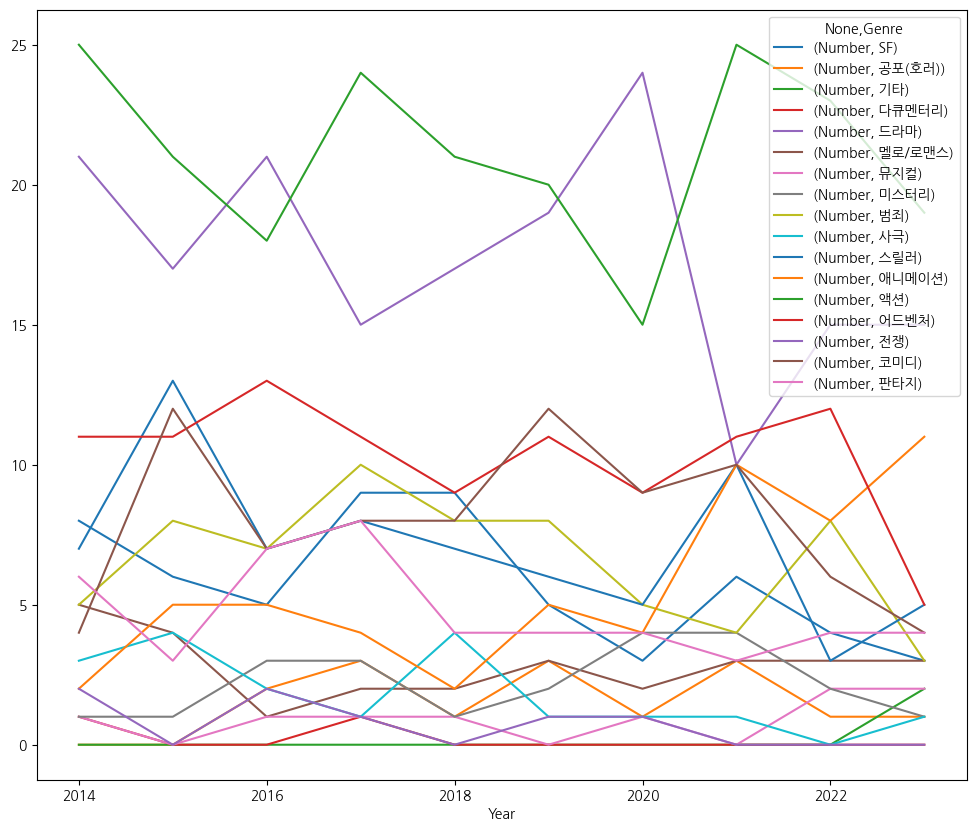

In [28]:
genre_total.plot(figsize=(12, 10))
plt.show()

In [33]:
numOfGenreBefOTT = []

befOTT = raw_data[(raw_data["Year"] >= 2014) & (raw_data["Year"] <= 2018)]

befOTT["Genre"] = befOTT["Genre"].apply(ast.literal_eval)
all_genres = befOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreBefOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreBefOTT}
num_of_genre_bef_ott = pd.DataFrame(data)
num_of_genre_bef_ott

/tmp/ipykernel_23272/2879099071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  befOTT["Genre"] = befOTT["Genre"].apply(ast.literal_eval)


,Genre,Number
0,미스터리,1.8
1,공포(호러),1.2
2,액션,21.8
3,범죄,7.6
4,판타지,5.6
5,드라마,18.2
6,SF,7.4
7,다큐멘터리,0.4
8,전쟁,1.0
9,코미디,7.8


In [32]:
numOfGenreAftOTT = []

aftOTT = raw_data[(raw_data["Year"] >= 2019) & (raw_data["Year"] <= 2023)]

aftOTT["Genre"] = aftOTT["Genre"].apply(ast.literal_eval)
all_genres = aftOTT["Genre"].explode()


for genre in genres:
    count = all_genres[all_genres == genre].count()
    count = count/5
    numOfGenreAftOTT.append(count)

data = {"Genre" : genres, "Number" : numOfGenreAftOTT}
num_of_genre_bef_ott = pd.DataFrame(data)
num_of_genre_bef_ott

/tmp/ipykernel_23272/2624520203.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aftOTT["Genre"] = aftOTT["Genre"].apply(ast.literal_eval)


,Genre,Number
0,미스터리,2.6
1,공포(호러),1.8
2,액션,20.4
3,범죄,5.6
4,판타지,3.8
5,드라마,16.6
6,SF,4.2
7,다큐멘터리,0.0
8,전쟁,0.4
9,코미디,8.2
